## Final Project Submission


* Student name: Isabella Lindgren
* Student pace: part time
* Scheduled project review date/time: 1/30/2020
* Instructor name: Eli Thomas
* Blog post URL: https://medium.com/@isalindgren313/evaluation-metrics-for-classification-problems-in-machine-learning-d9f9c7313190


# Diagnosing Heart Disease

The data I used for my module 5 project is the Heart Disease UCI dataset which I obtained from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci <br/>

## Contents <br/>
1. Introduction/Business Understanding
2. Exploratory Data Analysis
3. Data Preprocessing
4. Modeling (3 Models)- check with performance metrics
5. Conclusions


# Introduction/Business Understanding

According to the Centers for Disease Control (CDC), heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the US. Approximately 647,000 Americans die from heart disease each year, which is 1 in every 4 deaths. 

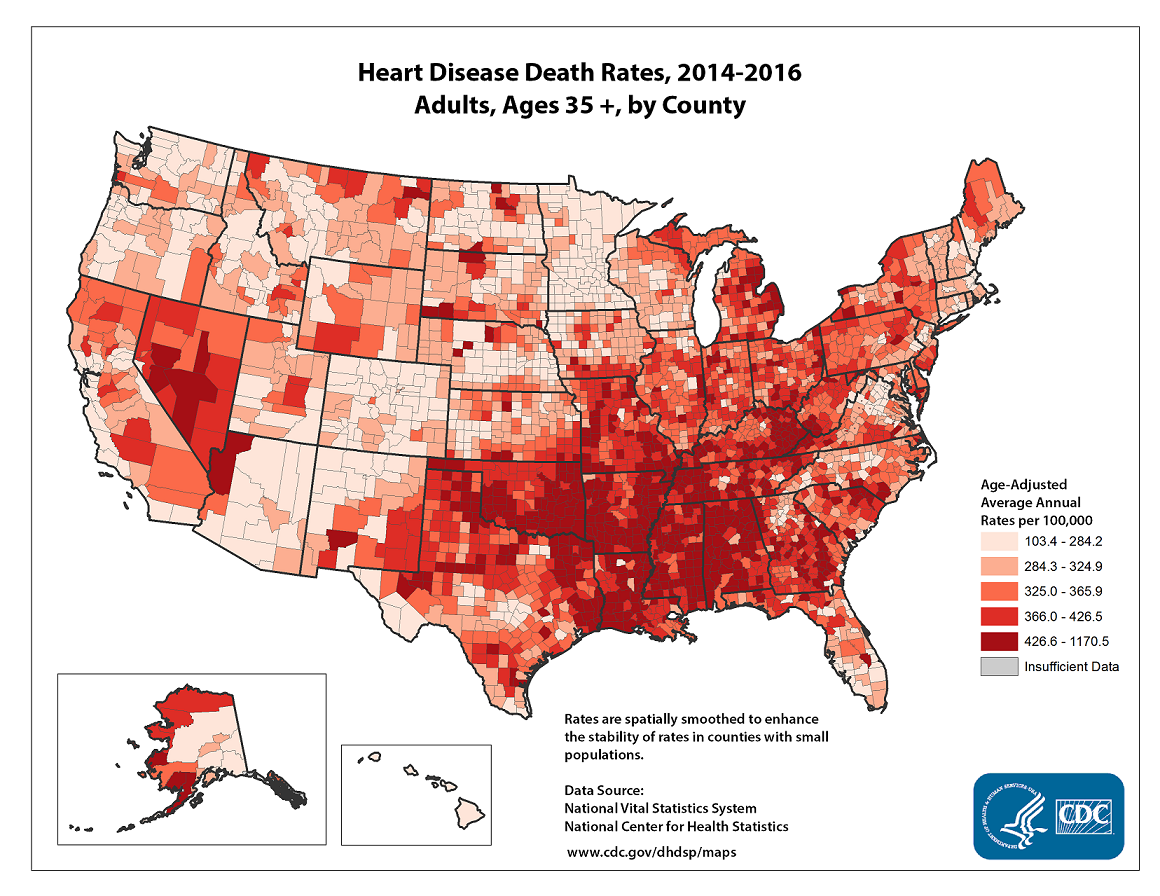
<br/>
Source: https://www.cdc.gov/heartdisease/facts.htm

Heart disease is diagnosed by first taking the family medical history, recording current and past symptoms, and then running various tests (i.e. electrocardiograms, CT scans, blood tests). 
<br/>
<br/>
Major risk factors for heart disease are **high blood pressure, high blood cholesterol, and smoking**. About half of Americans (47%) have at least one of these three factors. Other important factors are **diabetes, stress, obesity, nutrition, physical activity and family history.**
<br/>
<br/>
These factors could be separated into two separate categories: inherent and behavioural. Inherent factors cannot be changed, such as age, family history, diabetes and sex. Risk factors that are behavioural can be changed, such as smoking, alcohol use, high cholesterol, high blood pressure, physical activity, obesity, stress, and poor diet. 

### About the data: <br/>
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
<br/>
<br/>
Attribute Information:
> 1. age: The person's age in years
> 2. sex
> 3. cp: chest pain type (4 values)
> 4. trestbps: resting blood pressure
> 5. chol: serum cholestoral in mg/dl (1 = true; 0 = false)
> 6. fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
> 7. restecg: resting electrocardiographic results (values 0,1,2)
> 8. thalach: maximum heart rate achieved
> 9. exang: exercise induced angina
> 10. oldpeak: ST depression induced by exercise relative to rest
> 11. slope: the slope of the peak exercise ST segment
> 12. ca: number of major vessels (0-3) colored by flourosopy
> 13. thal: a blood disorder called Thalassemia 3 = normal; 6 = fixed defect; 7 = reversable defect (hereditary)
> 14. target: heart disease (0 = no; 1 = yes)

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #for plotting

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, classification_report #for model evaluation
#!pip install eli5
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

import warnings
warnings.simplefilter('ignore')

In [278]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Let's change the column names so that they are easier to understand.

In [279]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [280]:
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    1         0                      150   
1                    0         1                      187   
2                    0         0                      172   
3                    0         1                      178   
4                    0         1                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         0                  0   
1                        0            3.5         0                  0   
2                        0            1.4         2                  0   
3                        0            0.8         2                  0   
4                        1            0.6         2                  0   

   thalassemia  target  
0            1       1  
1            2       1  
2            2       1  
3            2       1  
4            2       1

# Data Exploration and Manipulation

Let's check the shape of the data and make sure that there are no missing values.

In [281]:
# Let's look at how many rows and columns there are
df.shape

(303, 14)

In [282]:
# check for missing values
df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [283]:
# are there any null values?
df.isnull().values.any()

False

Great! There are no missing values in this data set. This is because the data was cleaned prior to being uploaded into Kaggle. Let's have a look at our data more in depth and see what kind of information we have to work with.

In [284]:
# let's look at the basic stats
df.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       cholesterol  fasting_blood_sugar    rest_ecg  max_heart_rate_achieved  \
count   303.000000           303.000000  303.000000               303.000000   
mean    246.264026             0.148515    0.528053               149.646865   
std      51.830751             0.356198    0.525860                22.905161   
min     126.000000             0.000000    0.000000                71.000000   
25%     211.000000             0.000000    0.000000               133.500000   
50%     240.000000             0.000000    1.000000               153.000000   
75%     274.500000             0.000000    1.000000               166.000000   
max     564.000000             1.000000    2.000000               202.000000   

       exercise_induced_angina  st_depression    st_slope  num_major_vessels  \
count               303.000000     303.000000  303.000000         303.000000   
mean                  0.326733       1.039604    1.399340           0.729373   
std                   0.469794       1.161075    0.616226           1.022606   
min                   0.000000       0.000000    0.000000           0.000000   
25%                   0.000000       0.000000    1.000000           0.000000   
50%                   0.000000       0.800000    1.000000           0.000000   
75%                   1.000000       1.600000    2.000000           1.000000   
max                   1.000000       6.200000    2.000000           4.000000   

       thalassemia      target  
count   303.000000  303.000000  
mean      2.313531    0.544554  
std       0.612277    0.498835  
min       0.000000    0.000000  
25%       2.000000    0.000000  
50%       2.000000    1.000000  
75%       3.000000    1.000000  
max       3.000000    1.000000

We can see that there are a few categorical variables - we will need to hot encode these later.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [286]:
## Another cool way to see the different variable types is by data profiling
# !pip pandas_profiling
import pandas_profiling
from pandas_profiling import ProfileReport
profile = pandas_profiling.ProfileReport(df)
profile

In [287]:
# Let's have a look at what our target variable looks like
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

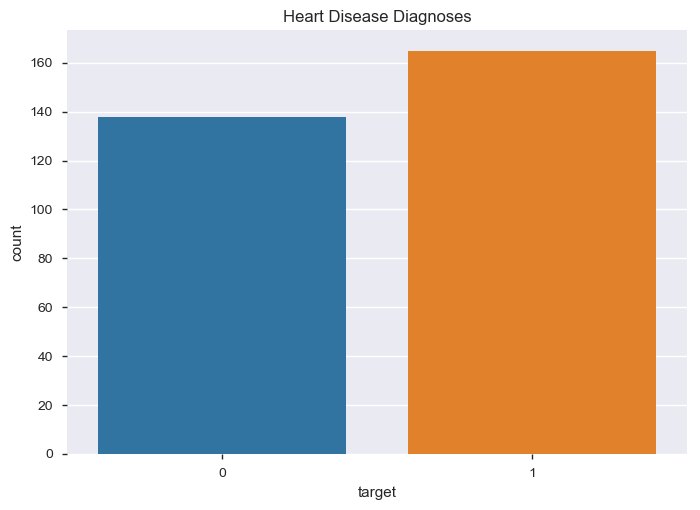

In [288]:
sns.countplot(x='target', data = df)
plt.title('Heart Disease Diagnoses')
plt.show()

Remember that 'target' stands for heart disease diagnosis. We can see that there are 165 patients WITH heart disease (target = 1) and 138 patients WITHOUT heart disease (target = 0) in this data set. Now let's explore various factors and how they relate to the target variable.
<br/>
<br/>
According to health.harvard.edu, on average, heart disease manifests in men at a younger age (~65 years) than women (~72 years). However, it is a leading cause of death in both men and women. Let's look at the distribution of heart disease diagnoses between the sexes.

In [289]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

Reminder: 
- for the variable 'sex': (1 = male; 0 = female)
- for the variable 'target': (1 = presence of heart disease; 0 = Absence of heart disease)

So from the data above, we can see that 72 of the total 96 females have heart disease and 24 do not. 93 out of the total 207 males have heart disease and 114 do not. 

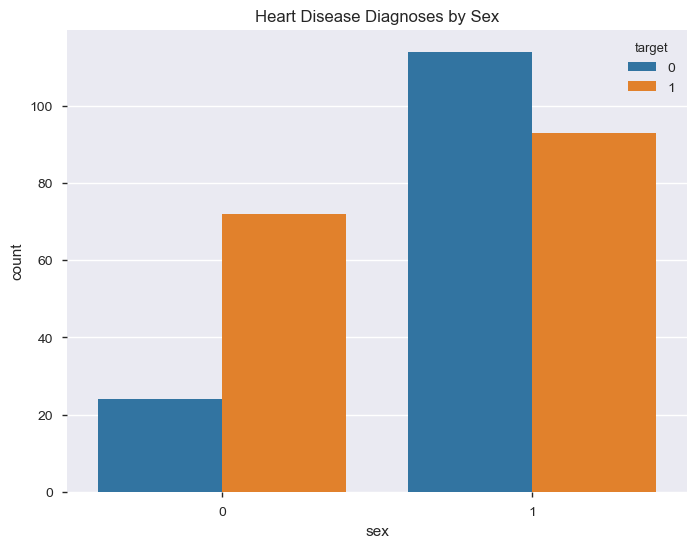

In [290]:
# Visualization of heart disease diagnoses by sex
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.title('Heart Disease Diagnoses by Sex')
plt.show()

In [291]:
cntFemale = len(df[df.sex == 0])
cntMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((cntFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((cntMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


Now let's have a look at the frequency of heart disease across the total age range.

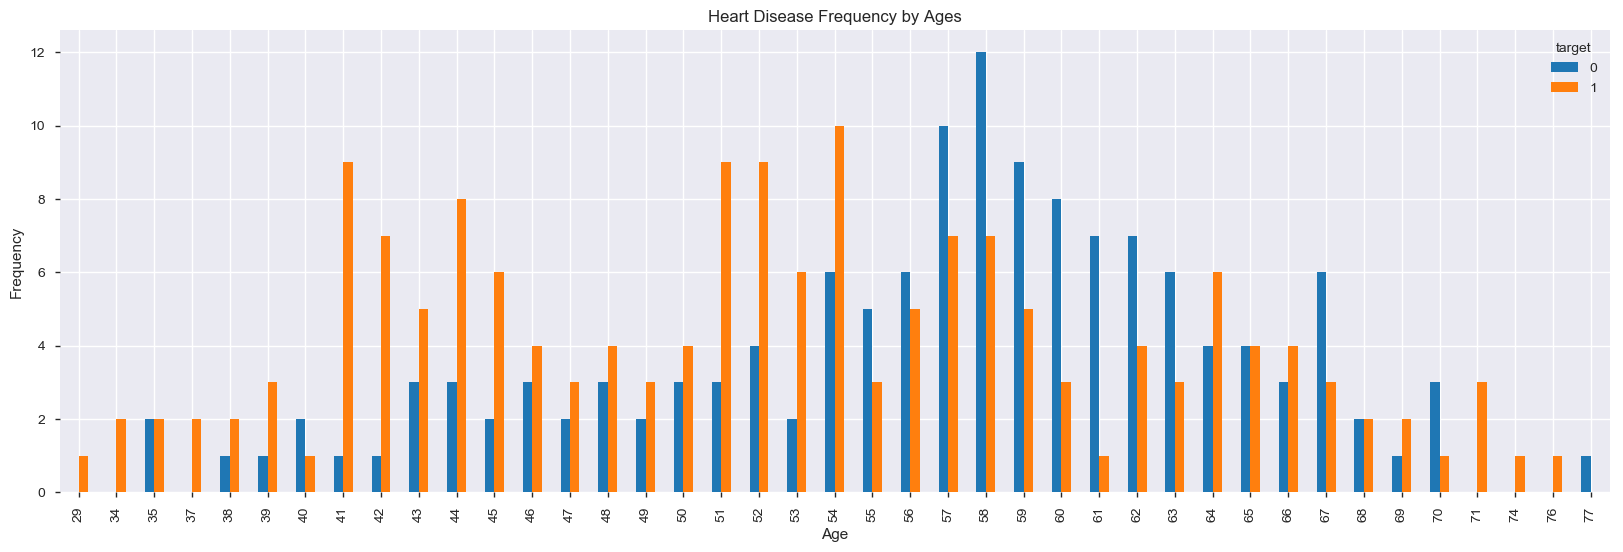

In [292]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency by Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

No handles with labels found to put in legend.


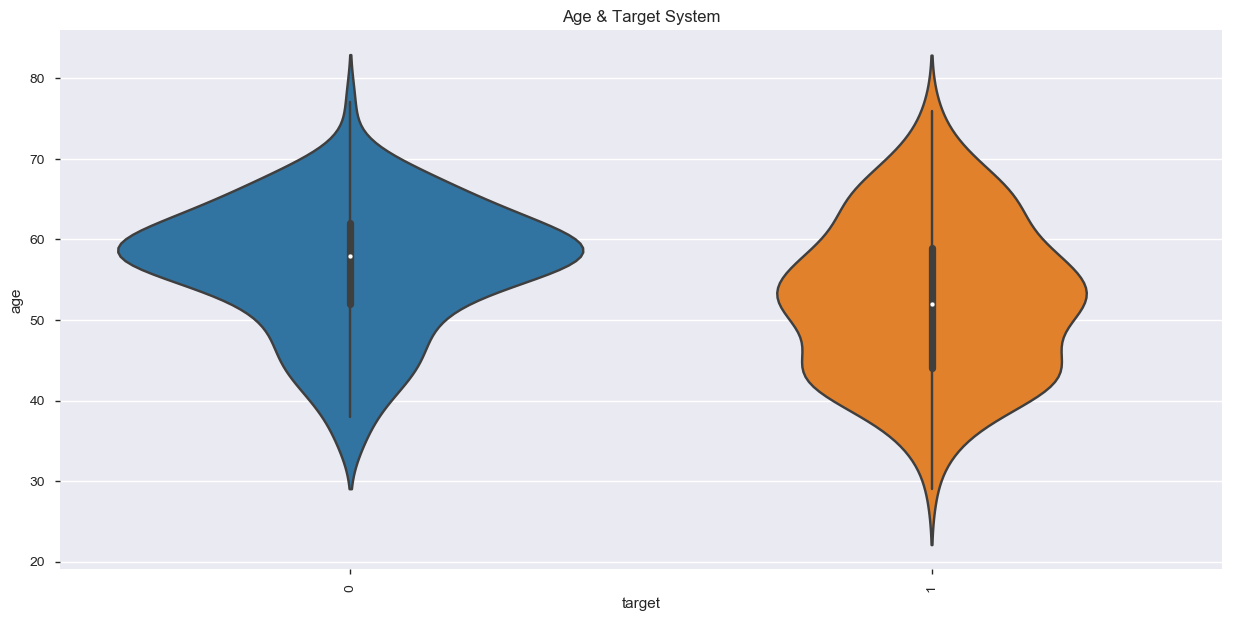

In [293]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df.target,y=df.age)
plt.xticks(rotation=90)
plt.legend()
plt.title("Age & Target System")
plt.show()

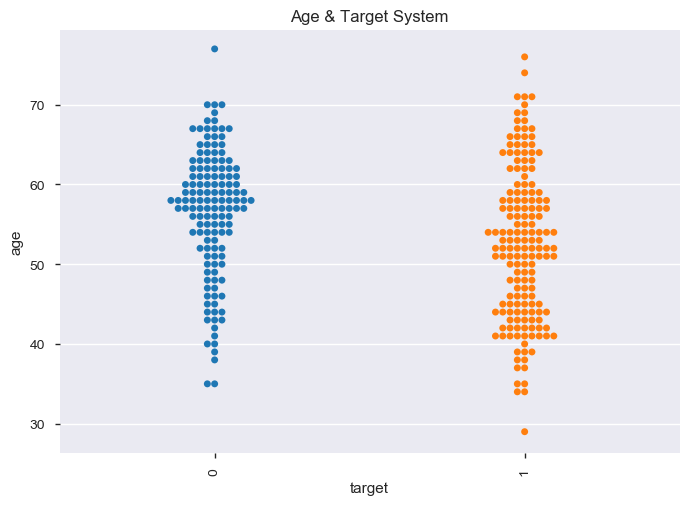

In [294]:
sns.swarmplot(x=df.target,y=df.age)
plt.xticks(rotation=90)
plt.title("Age & Target System")
plt.show()

Both men and women are affected by many similar factors which can contribute to heart disease, such as diabetes. Let's look at the frequency of heart disease by fasting blood sugar.

Reminder: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

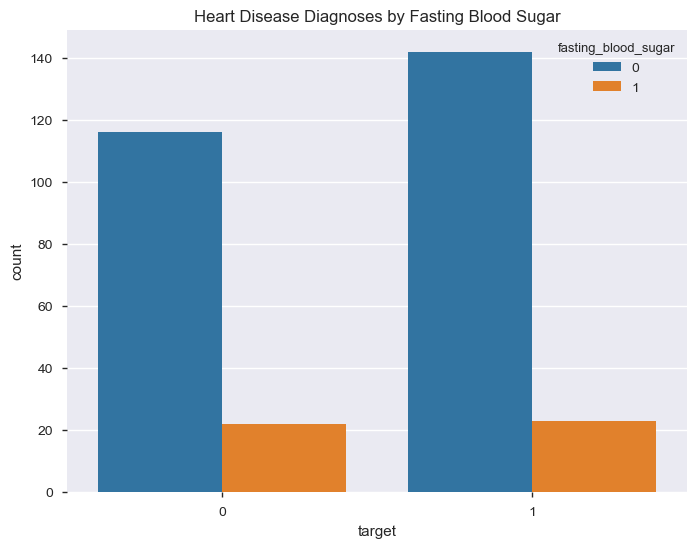

In [295]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fasting_blood_sugar", data=df)
plt.title('Heart Disease Diagnoses by Fasting Blood Sugar')
plt.show()

Excercise Induced Angina is chest pain caused by reduced blood flow to the heart triggered by physical activity. The symptoms of angina are often described as a squeezing, pressure, heaviness, tightness or pain in your chest. Let's look at the frequency of heart diagnoses by the reports of exercise induced angina.

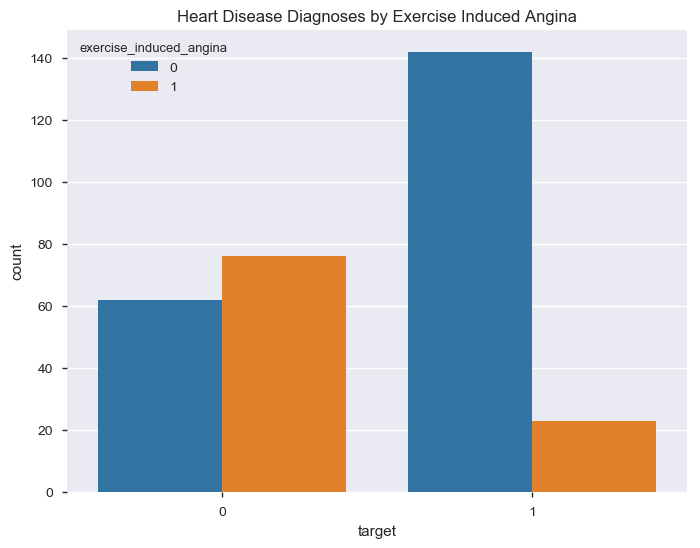

In [296]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exercise_induced_angina", data=df)
plt.title('Heart Disease Diagnoses by Exercise Induced Angina')
plt.show()

Tachycardia is a common type of heart rhythm disorder (arrhythmia) in which the heart beats faster than normal while at rest. If you have small or blocked arteries or veins, the heart may need to beat faster in order to provide essential oxygen throughout the body. It's normal for your heart rate to rise during exercise or as a physiological response to stress, trauma or illness. Let's look at the maximum heart rates of patients with and without heart disease on the same plot so we can look at any trends.

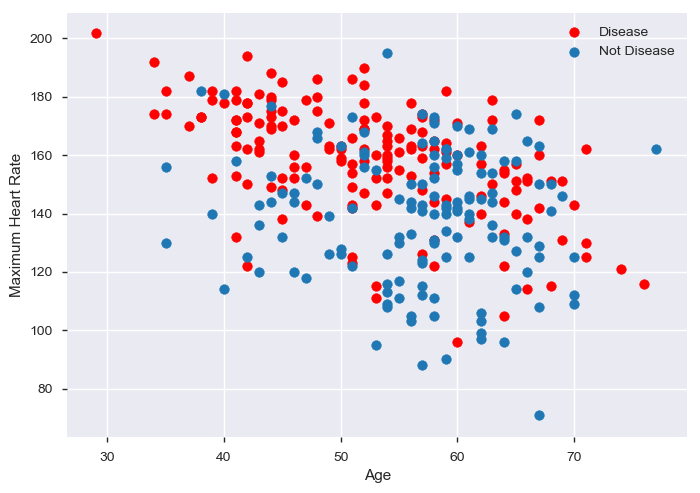

In [297]:
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

We can see that patients diagnosed with heart disease tend to have higher maximum heart rates than patients who don't have heart disease.

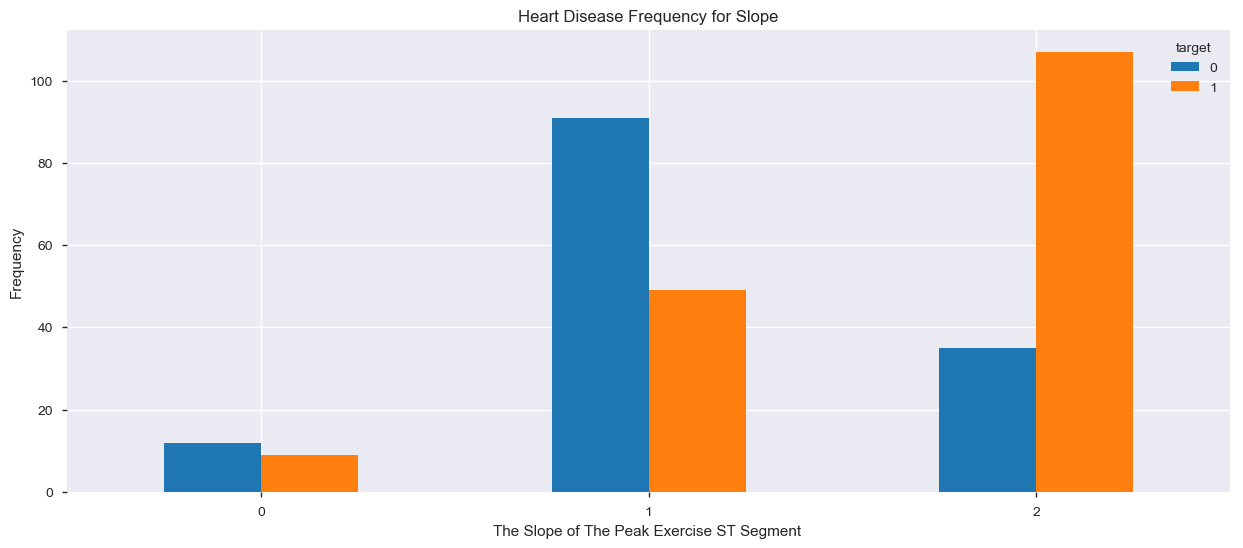

In [298]:
pd.crosstab(df.st_slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

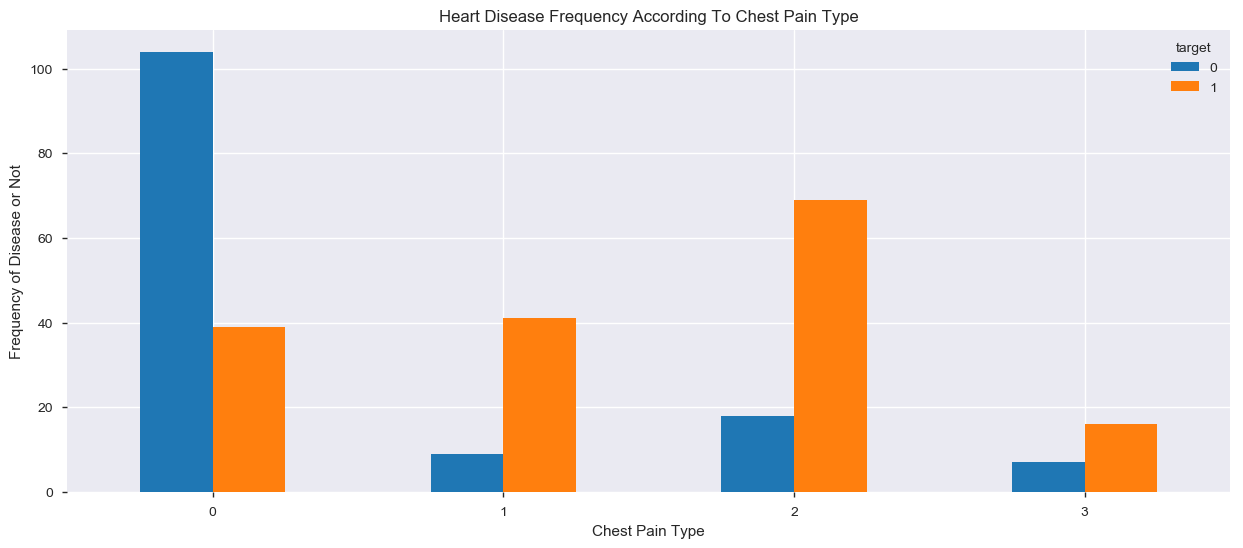

In [299]:
pd.crosstab(df.chest_pain_type,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

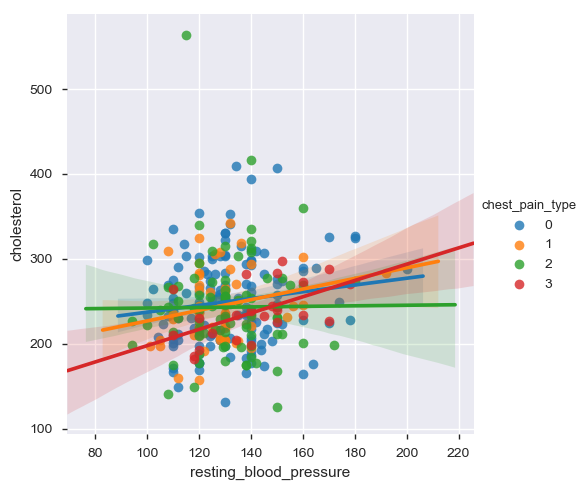

In [300]:
sns.lmplot(x="resting_blood_pressure", y="cholesterol",data=df,hue="chest_pain_type")
plt.show()

As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.

Now let's look at the correlation between the different variables using a heat map.

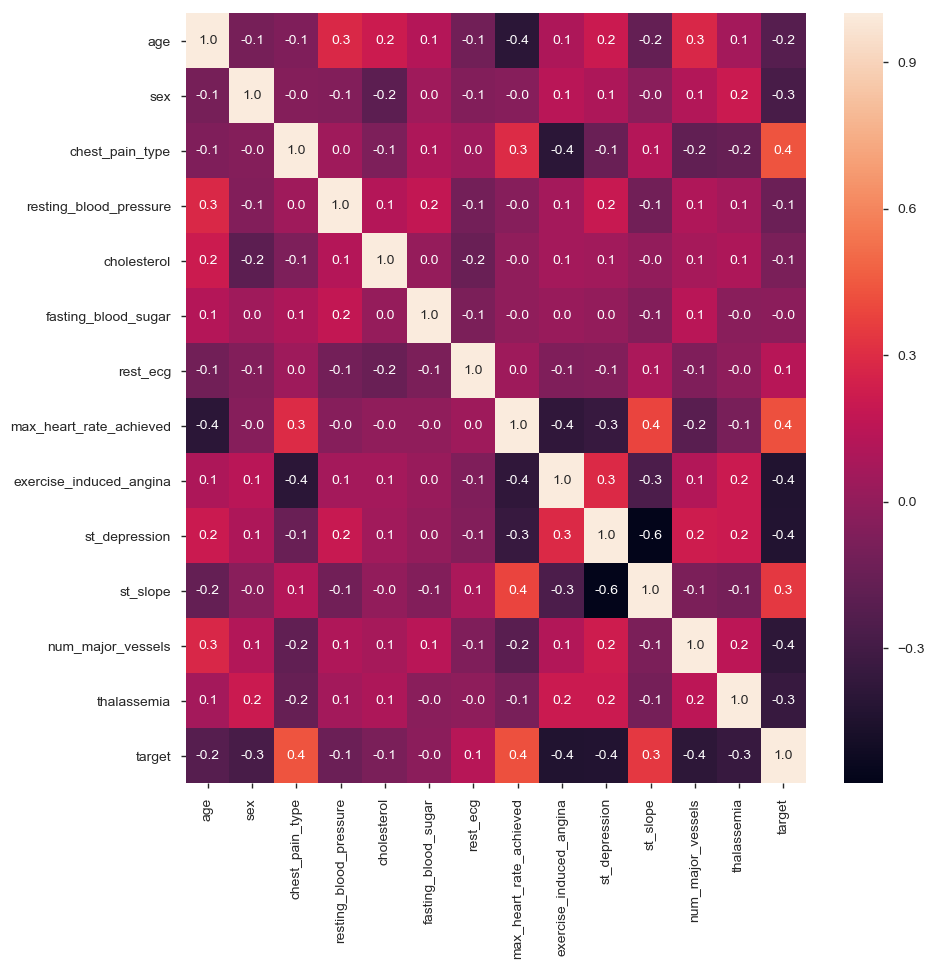

In [301]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

We can see that there aren't many variables that are highly correlated with each other, but we will have a closer look later on. Let's do a pairplot to visualize the relationships between all the variables.

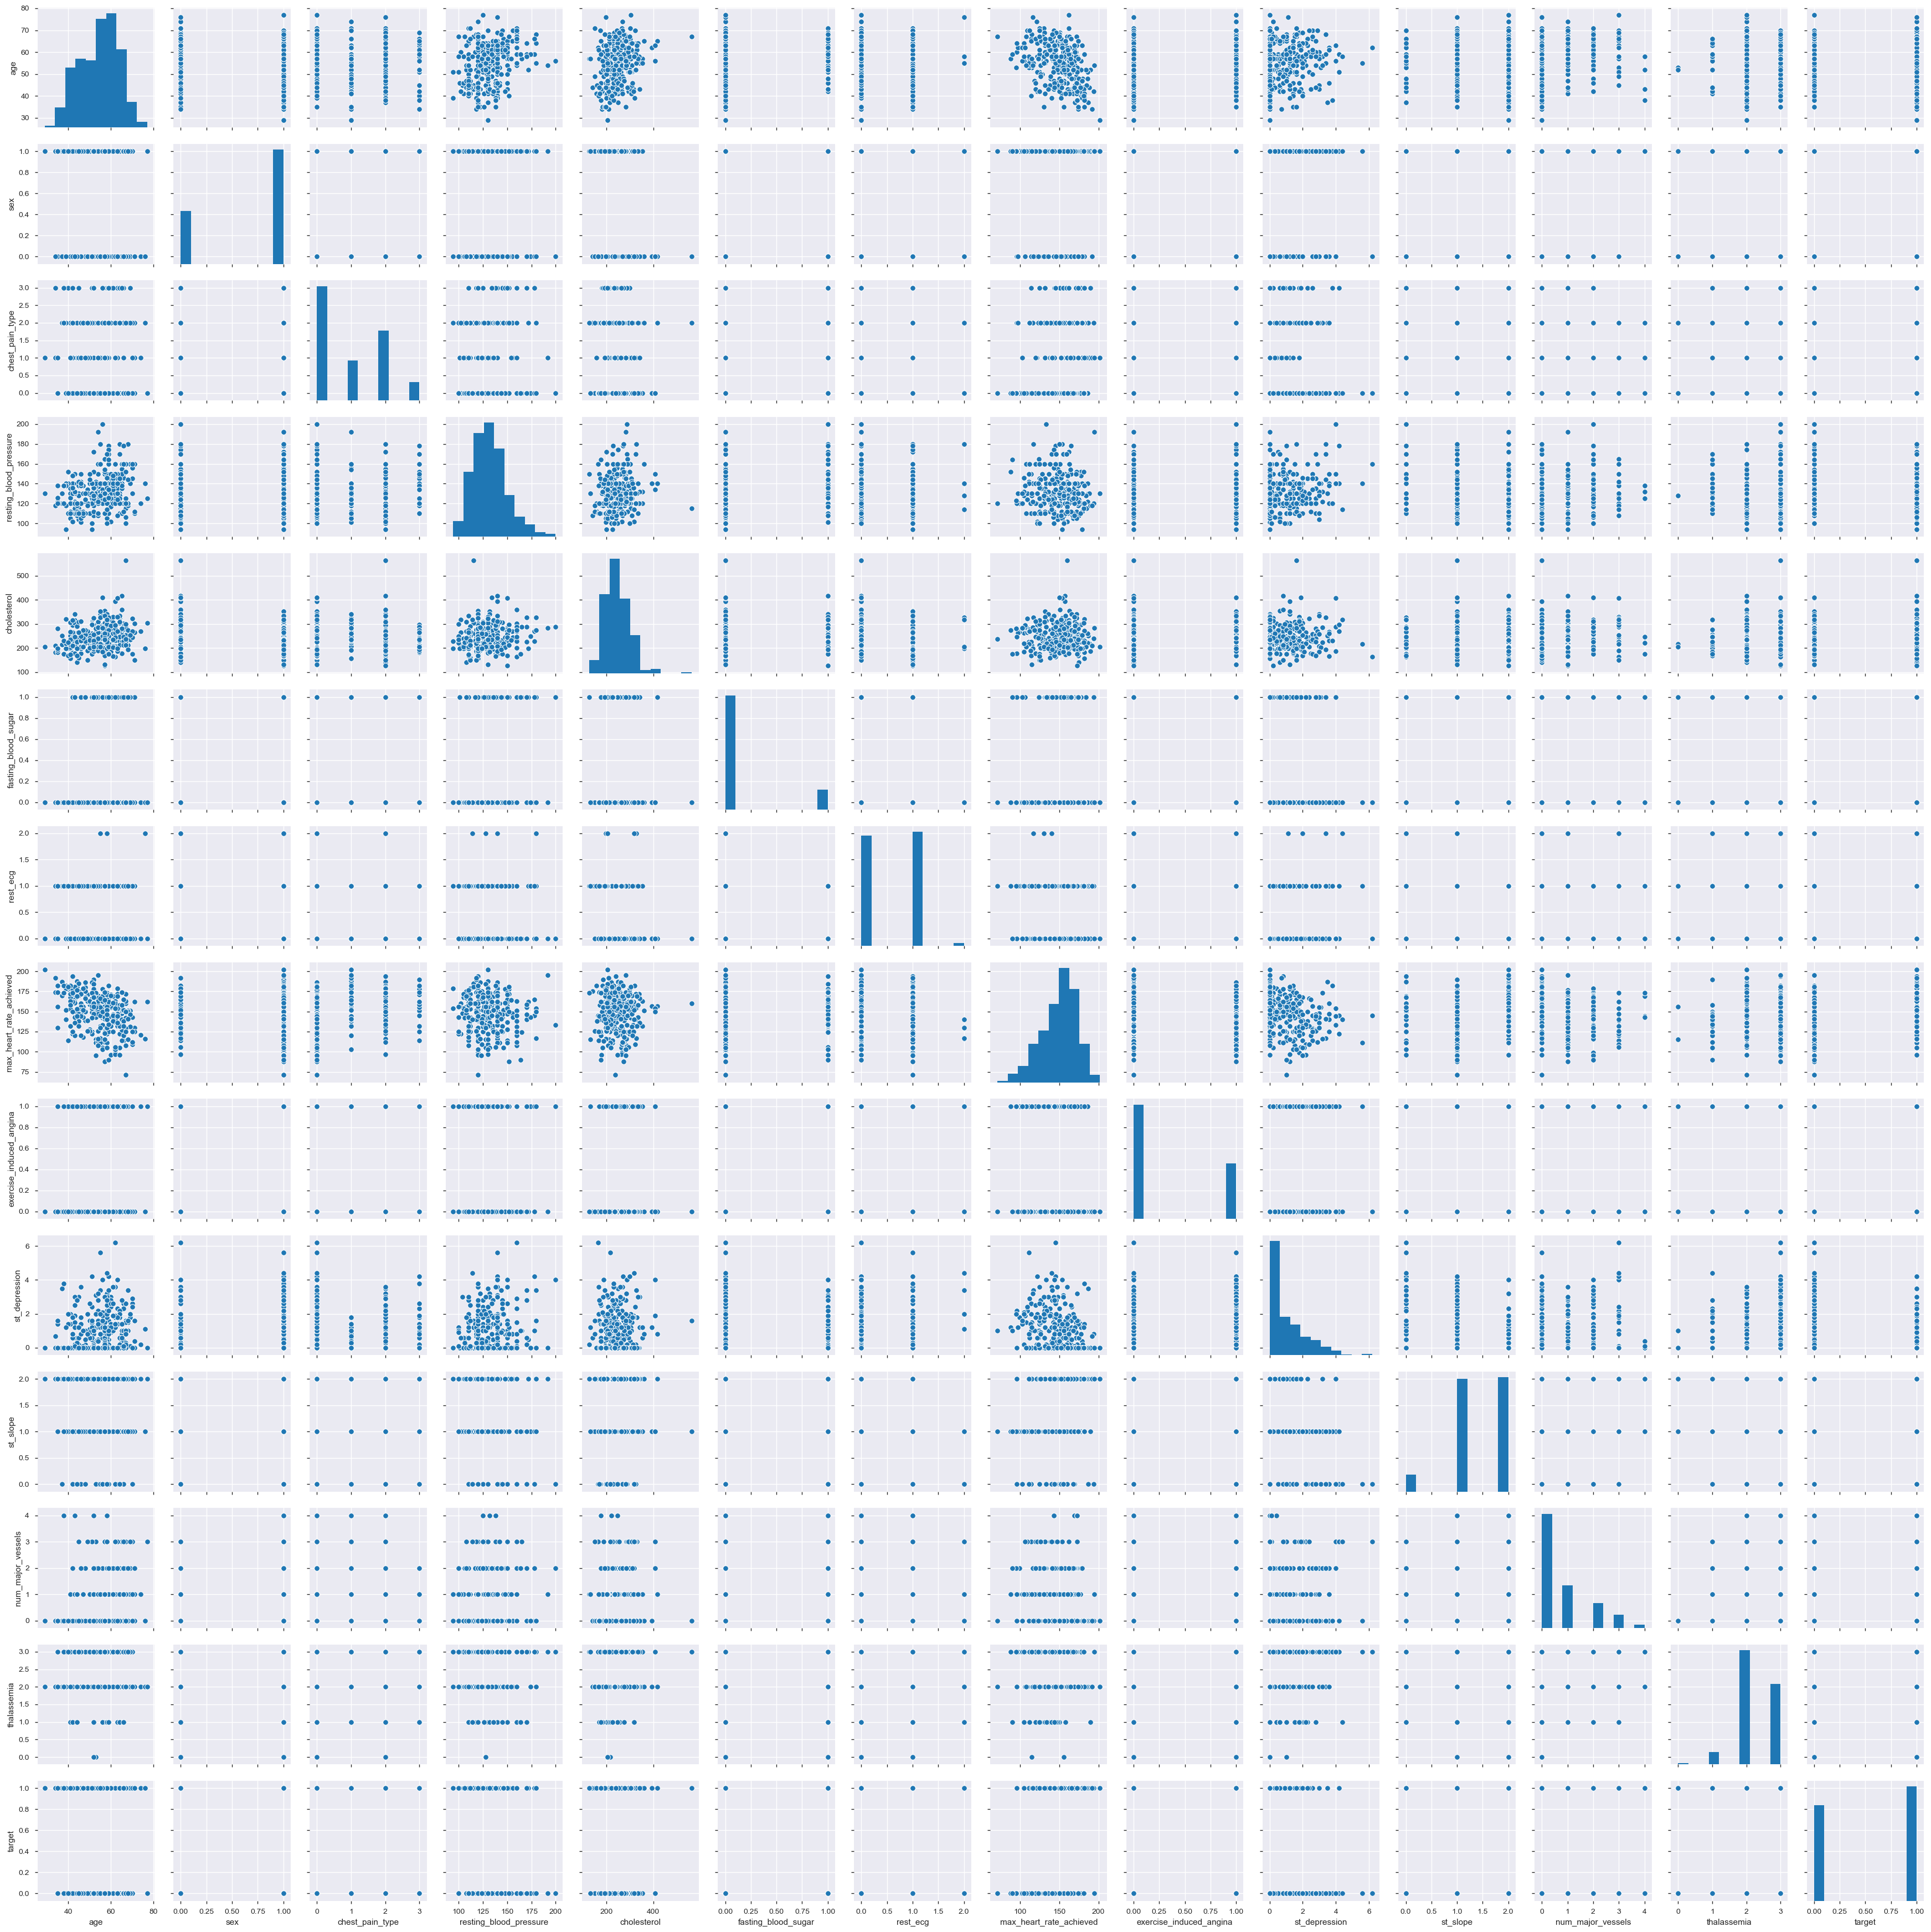

In [302]:
sns.pairplot(df)
plt.show()

# Data Preprocessing for Modeling

In order to better interpret the categorical variables, let's assign labels to the values so we avoid confusion.

In [303]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [304]:
# make sure the data types are correct 
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [305]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

Now let's create dummy variables for our categorical variables. It is important to remember to drop the first column when hot encoding to prevent redundancy.

In [306]:
# remember to drop the first column when hot encoding
df = pd.get_dummies(df, drop_first=True)

In [307]:
# Let's check what our data set looks like now
print(df.shape)
df.head()

(303, 20)


age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63                     145          233                      150   
1   37                     130          250                      187   
2   41                     130          204                      172   
3   56                     120          236                      178   
4   57                     120          354                      163   

   st_depression  num_major_vessels  target  sex_male  \
0            2.3                  0       1         1   
1            3.5                  0       1         1   
2            1.4                  0       1         0   
3            0.8                  0       1         1   
4            0.6                  0       1         0   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                                0                                 1   
1                                1                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                               0                                        0   
1                               0                                        1   
2                               1                                        1   
3                               1                                        1   
4                               0                                        1   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                                      0                1   
1                                      0                0   
2                                      0                1   
3                                      0                0   
4                                      0                0   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                            0              0                   0   
1                            0              0                   0   
2                            0              1                   0   
3                            0              1                   0   
4                            1              1                   0   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                         0                   1                              0  
1                         1                   0                              0  
2                         1                   0                              0  
3                         1                   0                              0  
4                         1                   0                              0

We can see we went from having 14 columns to having 20 columns. Now let's define the features.

In [308]:
features = df.drop(['target'], axis=1).columns
print(features)

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'sex_male', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
       'exercise_induced_angina_yes', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemia_fixed defect', 'thalassemia_normal',
       'thalassemia_reversable defect'],
      dtype='object')


Now let's create our X and y variables for our models.

In [309]:
y = df.target.values
X = df.drop(['target'], axis = 1).values

Now that we preprocessed the data, let's split it into training and testing sets using train_test_split from sklearn. We will split our data so that 80% of our data is for training and 20% is for testing.

In [310]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data

Next, we will normalize our data in order to ensure our data is represented on the same scale. Normalization is also called *Standardization* or *Scaling*. We are performing this **after** splitting our data to avoid information leaking from our test set into our training set. 

Normalize the data

In [311]:
# Standardize the features
X = StandardScaler().fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0  0.952197                0.763956    -0.256334                 0.015443   
1 -1.915313               -0.092738     0.072199                 1.633471   
2 -1.474158               -0.092738    -0.816773                 0.977514   
3  0.180175               -0.663867    -0.198357                 1.239897   
4  0.290464               -0.663867     2.082050                 0.583939   

   st_depression  num_major_vessels  sex_male  \
0       1.087338          -0.714429  0.681005   
1       2.122573          -0.714429  0.681005   
2       0.310912          -0.714429 -1.468418   
3      -0.206705          -0.714429  0.681005   
4      -0.379244          -0.714429 -1.468418   

   chest_pain_type_atypical angina  chest_pain_type_non-anginal pain  \
0                        -0.634648                          3.489114   
1                         1.575677                         -0.286606   
2                        -0.634648                         -0.286606   
3                        -0.634648                         -0.286606   
4                        -0.634648                         -0.286606   

   chest_pain_type_typical angina  fasting_blood_sugar_lower than 120mg/ml  \
0                       -0.444554                                -2.394438   
1                       -0.444554                                 0.417635   
2                        2.249444                                 0.417635   
3                        2.249444                                 0.417635   
4                       -0.444554                                 0.417635   

   rest_ecg_left ventricular hypertrophy  rest_ecg_normal  \
0                              -0.115663         1.030158   
1                              -0.115663        -0.970725   
2                              -0.115663         1.030158   
3                              -0.115663        -0.970725   
4                              -0.115663        -0.970725   

   exercise_induced_angina_yes  st_slope_flat  st_slope_upsloping  \
0                    -0.696631      -0.939142           -0.926766   
1                    -0.696631      -0.939142           -0.926766   
2                    -0.696631       1.064802           -0.926766   
3                    -0.696631       1.064802           -0.926766   
4                     1.435481       1.064802           -0.926766   

   thalassemia_fixed defect  thalassemia_normal  thalassemia_reversable defect  
0                 -1.100763            3.979112                      -0.793116  
1                  0.908461           -0.251312                      -0.793116  
2                  0.908461           -0.251312                      -0.793116  
3                  0.908461           -0.251312                      -0.793116  
4                  0.908461           -0.251312                      -0.793116

# Model 1: Logistic Regression (using sklearn)

In [312]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import balanced_accuracy_score

accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 80.33%


In [313]:
y_predict_lr = lr.predict(X_test)
y_pred_quant_lr = lr.predict_proba(X_test)[:, 1]
y_pred_bin_lr = lr.predict(X_test)

In [314]:
from sklearn.metrics import confusion_matrix
# Confusion matrix and classification report
confusion_matrix = confusion_matrix(y_test, y_pred_bin_lr)
confusion_matrix

array([[29,  6],
       [ 6, 20]], dtype=int64)

It may sound good to check our model using the accuracy evaluation metric, but not in this case since our data is unbalanced. In medical diagnosis, it is important to use sensitivity and specificity to evaluate our model. Sensitivity is the ability of a test to correctly identify those with the disease (true positive rate) and specificity is the ability of the test to correctly identify those without the disease (true negative rate). The higher the value, the better it is.

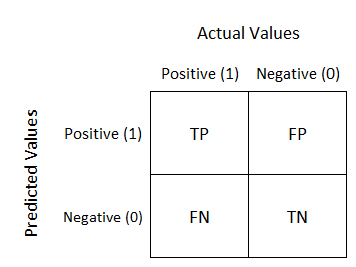

In [321]:
# Test sensitivity and specificity
sensitivities = {}
specificities = {}

total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['Linear_Reg'] = sensitivity
print('Sensitivity of Linear Regression Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['Linear_Reg'] = specificity
print('Specificity of Linear Regression Model: ', specificity)

Sensitivity of Linear Regression Model:  0.8285714285714286
Specificity of Linear Regression Model:  0.7692307692307693


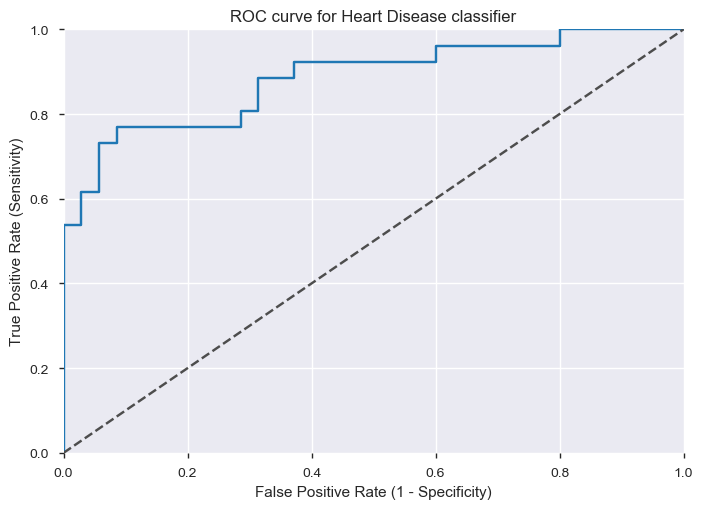

In [322]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_lr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [323]:
auc(fpr, tpr)

0.8846153846153847

# Model 2: Decision Tree Classifier

In [324]:
# Instantiate and fit a DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='gini', max_depth=5) 
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [325]:
#Feature Importance
DTC.feature_importances_

array([0.06865303, 0.0440123 , 0.06975561, 0.06183917, 0.06176074,
       0.31846751, 0.02620304, 0.0985456 , 0.02315396, 0.04083591,
       0.        , 0.        , 0.        , 0.09755261, 0.        ,
       0.        , 0.08922054, 0.        , 0.        ])

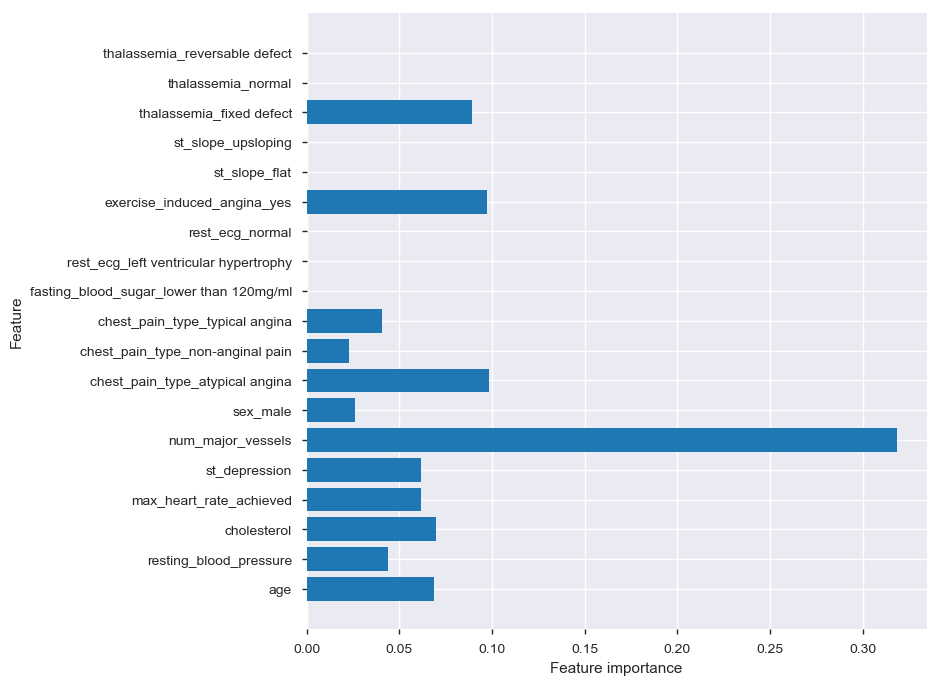

In [326]:
# Let's visualize the feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DTC)

In [327]:
y_predict_DTC = DTC.predict(X_test)
y_pred_quant_DTC = DTC.predict_proba(X_test)[:, 1]
y_pred_bin_DTC = DTC.predict(X_test)

In [328]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_DTC)
confusion_matrix

array([[28,  7],
       [ 8, 18]], dtype=int64)

In [329]:
# Test sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['Decision Tree'] = sensitivity
print('Sensitivity of Decision Tree Classifier Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['Decision Tree'] = specificity
print('Specificity of Decision Tree Classifier Model: ', specificity)

Sensitivity of Decision Tree Classifier Model:  0.7777777777777778
Specificity of Decision Tree Classifier Model:  0.72


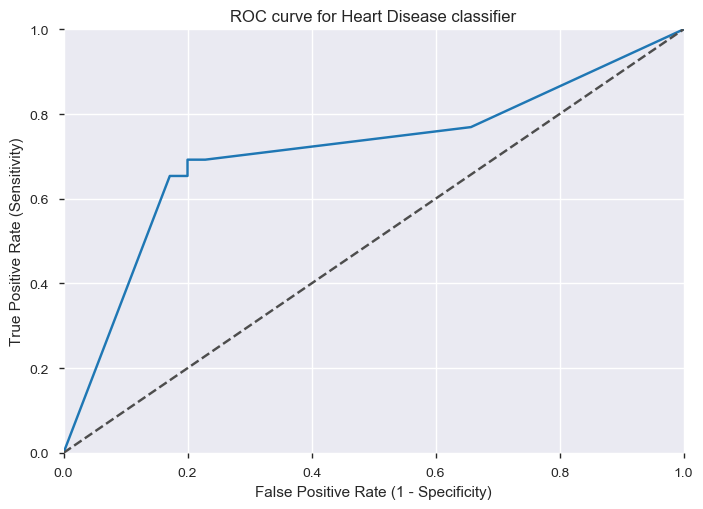

In [330]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Our ROC curve looks like it needs a little work. The curve should hug the top left of the plot. 

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

> - 0.90 - 1.00 = excellent 
> - 0.80 - 0.90 = good
> - 0.70 - 0.80 = fair
> - 0.60 - 0.70 = poor
> - 0.50 - 0.60 = fail

In [331]:
auc(fpr, tpr)

0.710989010989011

In [332]:
#Let's look at accuracy as well
acc = DTC.score(X_test,y_test)*100
accuracies['DTC'] = acc
print("Accuracy of Decision Tree Classifier: {:.2f}%".format(acc))

Accuracy of Decision Tree Classifier: 75.41%


### Bagging Trees

Bagging (Bootstrap Aggregation) is an ensemble method which combines several decision making trees to reduce the variance and produce a better predictive performance than just a single decision tree. In bagging, we create several subsets of data from the training data chosen randomly WITH replacement. Each of these subsets train their own decision trees and then we average all the predictions from the various trees. This allows for a more robust model. 

In [333]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=4), 
                                 n_estimators=20)

# After some trial and error, max_depth = 4 had the best result 

In [334]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=4,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [335]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.9297520661157025

Our performance was extremely well using the bagging ensemble method!

In [336]:
y_predict_bag = bagged_tree.predict(X_test)
y_pred_quant_bag = bagged_tree.predict_proba(X_test)[:, 1]
y_pred_bin_bag = bagged_tree.predict(X_test)

In [337]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_bag)
confusion_matrix

array([[30,  5],
       [ 5, 21]], dtype=int64)

In [338]:
# Test sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['Bagged Tree'] = sensitivity
print('Sensitivity of Bagged Decision Tree Classifier Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['Bagged Tree'] = specificity
print('Specificity of Bagged Decision Tree Classifier Model: ', specificity)

Sensitivity of Bagged Decision Tree Classifier Model:  0.8571428571428571
Specificity of Bagged Decision Tree Classifier Model:  0.8076923076923077


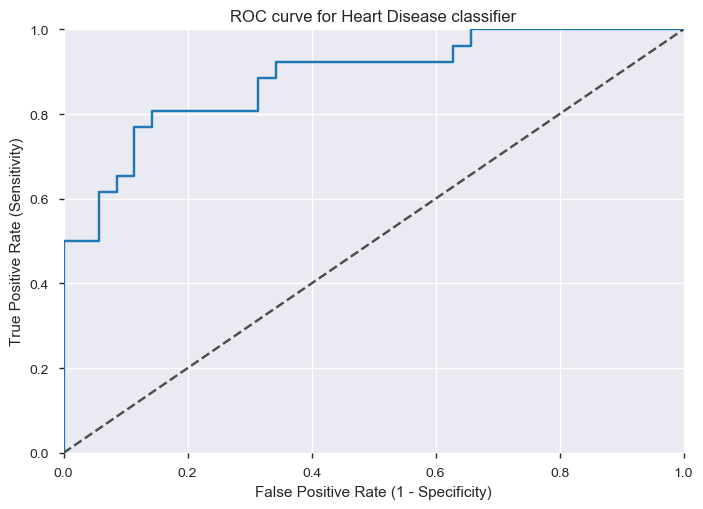

In [339]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_bag)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

It looks like our model has a good ROC. The ROC should hug the top right of the plot. 

In [340]:
auc(fpr, tpr)

0.8846153846153847

In [341]:
#Let's look at accuracy as well
acc = bagged_tree.score(X_test,y_test)*100
accuracies['bagged_tree'] = acc
print("Accuracy of Bagged Tree: {:.2f}%".format(acc))

Accuracy of Bagged Tree: 83.61%


Our model has a AUC value of 0.87 which is good! The accuracy is high as well. This emsemble method performs the best so far.

# Model 3: Random Forest Classifier

In [342]:
RFC = RandomForestClassifier(max_depth=5)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [343]:
estimator = RFC.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [344]:
#code from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

Let's evaluate the model performance with a confusion matrix.

In [345]:
y_predict_rfc = RFC.predict(X_test)
y_pred_quant_rfc = RFC.predict_proba(X_test)[:, 1]
y_pred_bin_rfc = RFC.predict(X_test)

In [346]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bin_rfc)
confusion_matrix

array([[27,  8],
       [ 5, 21]], dtype=int64)

In [347]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['RFC'] = sensitivity
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['SVC'] = specificity
print('Specificity : ', specificity)

Sensitivity :  0.84375
Specificity :  0.7241379310344828


Both the sensitivity and specificity are high which are good.

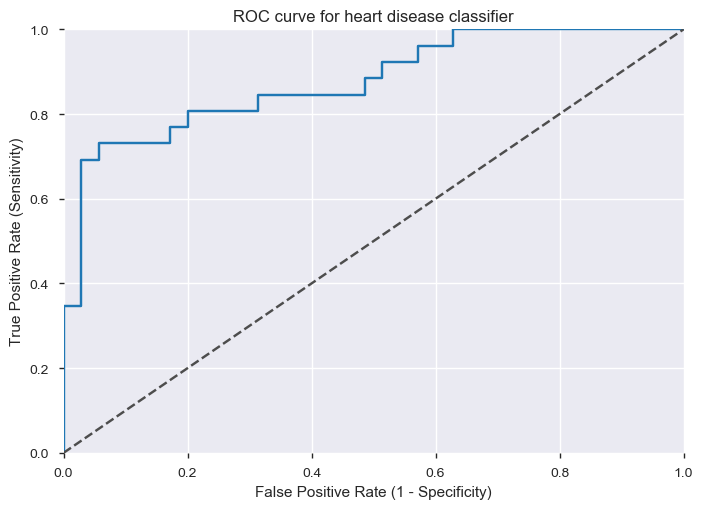

In [348]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_rfc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for heart disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [349]:
auc(fpr, tpr)

0.876923076923077

In [350]:
acc = RFC.score(X_test,y_test)*100
accuracies['Random_Forest_Classifier'] = acc
print("Accuracy of Random Forest Classifier: {:.2f}%".format(acc))

Accuracy of Random Forest Classifier: 78.69%


Our model is performing very well! Now let's explore which variables are important by using **Permutation Importance**. This tool allows us to shuffle variables in the validation data and see the effect on accuracy of the model. <br/> link: https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html <br/>

In [351]:
perm = PermutationImportance(RFC, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

The *SHAP value* stands for *SHapley Additive exPlanations* and is a great tool for understanding your model. The Shapley value is the average of the marginal contributions across all permutations. It can show how much each predictor contributes, positively or negatively, to the target variable. This is great for interpretability and transparency of your model. SHAP values can be calculated for any tree-based model. 
<br/>
<br/>
This blog post is extremely helpful in explaining the basics of SHAP values and how to use it: https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

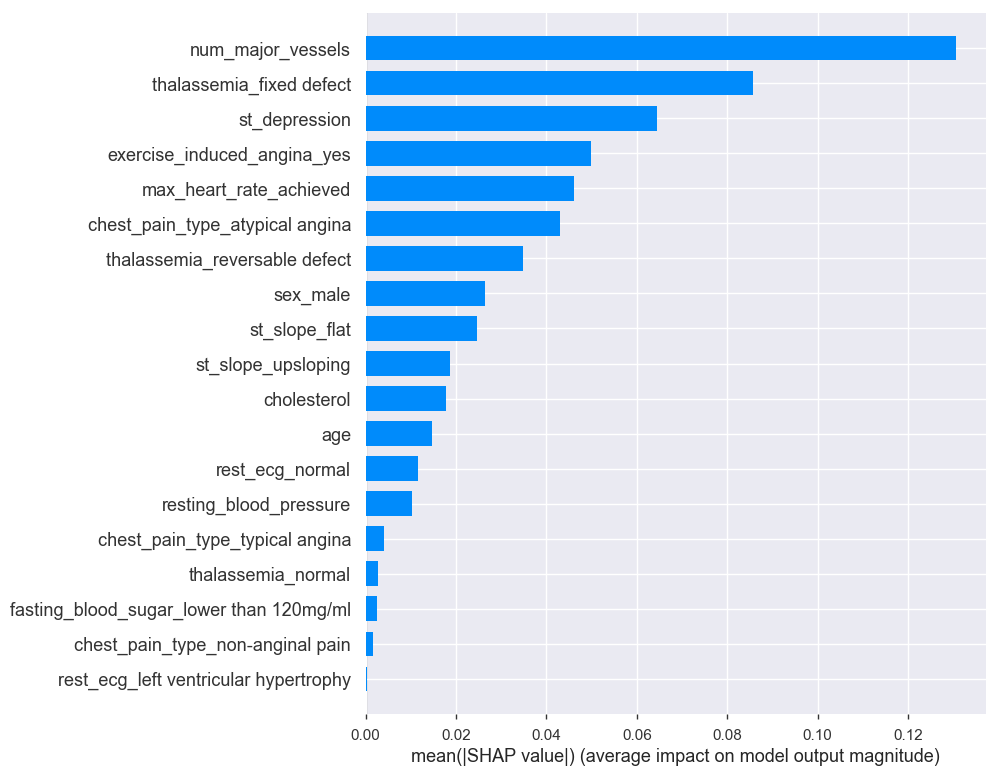

In [352]:
#!pip install shap
import shap 
explainer = shap.TreeExplainer(RFC)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

The number of blood vessels has the highest impact. We can view a summary plot of the SHAP values to visualize their impact on the model output.

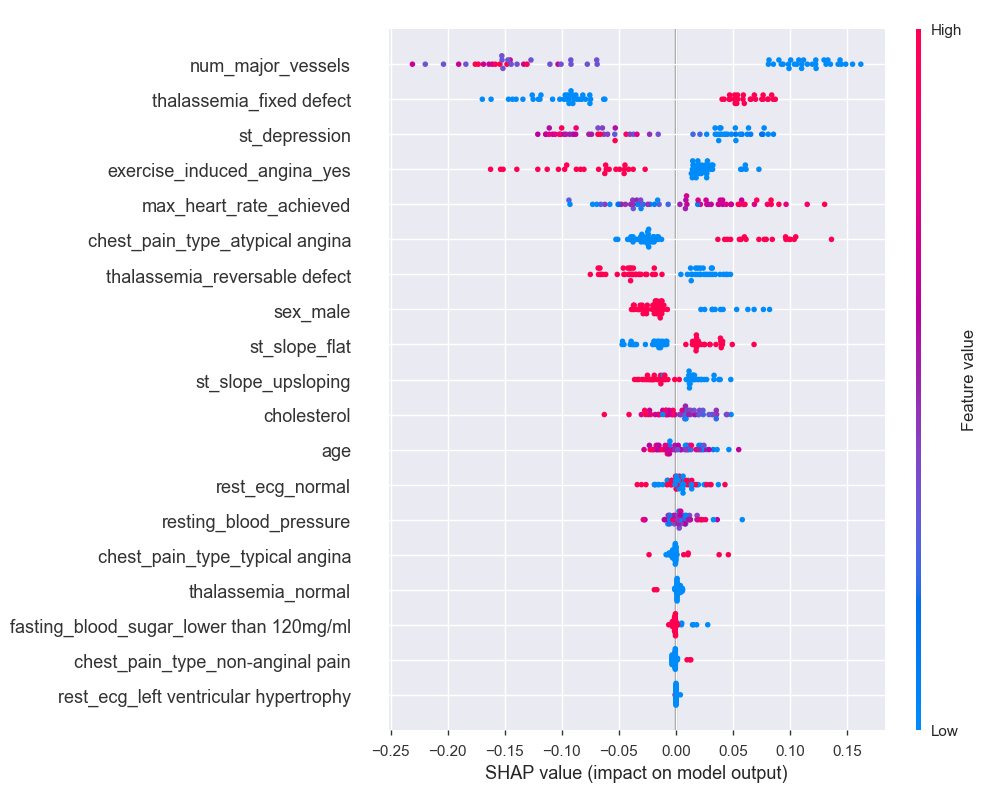

In [353]:
shap.summary_plot(shap_values[1], X_test)

**Observations:** <br/>
- The division is clear for num_major_vessels, thalassemia_fixed defect, chest_pain_type_atypical angina, exercise_induced_angina, sex_male, st_slope_upsloping, thalassemia_reversable defect
- For the number of major blood vessels, low values are bad (blue values are on the right side).
- For thalassemia_fixed defect red = bad, blue = good
- Note that men have a reduced chance of heart disease in this model. This is strange since it is known that men have a greater chance of heart disease.

Another great use of SHAP is that it allows us to pick out individual patients and see how the different variables are affecting their outcomes.

In [354]:
# first let's define a function to plot each patient
def heart_disease_risk_factors(RFC, patient):

    explainer = shap.TreeExplainer(RFC)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [355]:
# Now let's look at our first patient
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(RFC, data_for_prediction)

For this patient, their prediction is 25% compared to the base value of 56.32%. The st_depression, number of major vessels, and thalassemia fixed defect played a large role in their favor.

In [356]:
data_for_prediction = X_test.iloc[12,:].astype(float)
heart_disease_risk_factors(RFC, data_for_prediction)

For this patient, their prediction is 0.90% compared to the base value of 56.32%. Having a low number of major vessels, low st_depression, high and high cholesterol played a large role in increasing their chance of heart disease.

# Model 4: K-Nearest Neighbour (KNN) Classification

In [357]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 NN Score: 63.93%


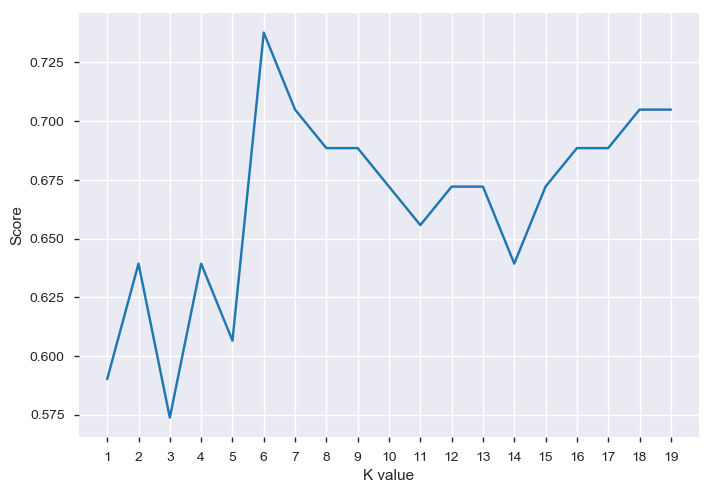

Maximum KNN Score is 73.77%


In [358]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Looks like our optimal K value is 6

In [359]:
y_predict_knn = knn.predict(X_test)
y_pred_quant_knn = knn.predict_proba(X_test)[:, 1]
y_pred_bin_knn = knn.predict(X_test)

In [360]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_knn)
confusion_matrix

array([[27,  8],
       [14, 12]], dtype=int64)

In [361]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.6585365853658537
Specificity :  0.6


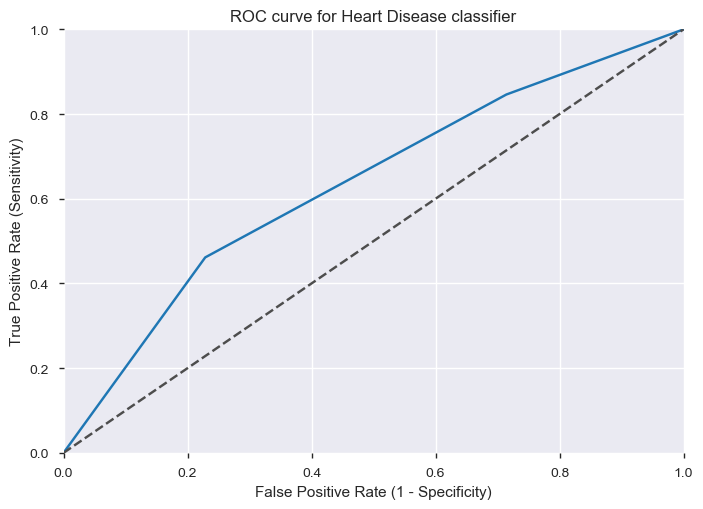

In [362]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_knn)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [363]:
auc(fpr, tpr)

0.634065934065934

Our ROC curve doesn't look too great and our AUC value is poor at K 2. Let's try again with the optimal value, 6

In [364]:
knn = KNeighborsClassifier(n_neighbors = 6)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(6, knn.score(X_test, y_test)*100))

6 NN Score: 73.77%


In [365]:
y_predict_knn6 = knn.predict(X_test)
y_pred_quant_knn6 = knn.predict_proba(X_test)[:, 1]
y_pred_bin_knn6 = knn.predict(X_test)

In [366]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_knn6)
confusion_matrix

array([[27,  8],
       [ 8, 18]], dtype=int64)

In [367]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['KNN'] = sensitivity
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['KNN'] = specificity
print('Specificity : ', specificity)

Sensitivity :  0.7714285714285715
Specificity :  0.6923076923076923


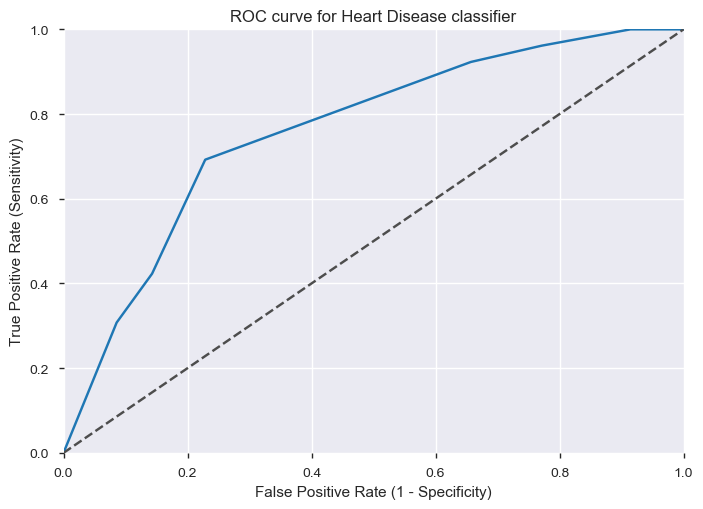

In [368]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_knn6)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [369]:
auc(fpr, tpr)

0.7615384615384616

We can see that the performance improved, but the ROC curve still looks a little wonky.

# Model 5: Support Vector Model (SVM)

In [370]:
svm = SVC(kernel='linear', random_state = 123, probability=True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [371]:
svm.coef_

array([[ 0.02133286, -0.02174683, -0.00254691,  0.01640124, -0.21335677,
        -0.97799022, -0.76887548,  0.96168302,  1.07752563,  0.24839441,
        -0.2752697 ,  0.        ,  0.04970292, -0.67856893,  0.40370622,
        -0.50209187,  0.88058189,  0.09838566,  0.02103245]])

In [372]:
svm.support_vectors_

array([[ 59., 134., 204., ...,   1.,   0.,   0.],
       [ 41., 110., 172., ...,   0.,   0.,   1.],
       [ 59., 170., 288., ...,   0.,   0.,   1.],
       ...,
       [ 54., 125., 273., ...,   1.,   0.,   0.],
       [ 51., 140., 261., ...,   1.,   0.,   0.],
       [ 52., 172., 199., ...,   0.,   0.,   1.]])

In [373]:
y_predict_svm = svm.predict(X_test)
y_pred_quant_svm = svm.predict_proba(X_test)[:, 1]
y_pred_bin_svm = svm.predict(X_test)

In [374]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_svm)
confusion_matrix

array([[28,  7],
       [ 5, 21]], dtype=int64)

In [375]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['Support Vector'] = sensitivity
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['Support Vector'] = specificity
print('Specificity : ', specificity)

Sensitivity :  0.8484848484848485
Specificity :  0.75


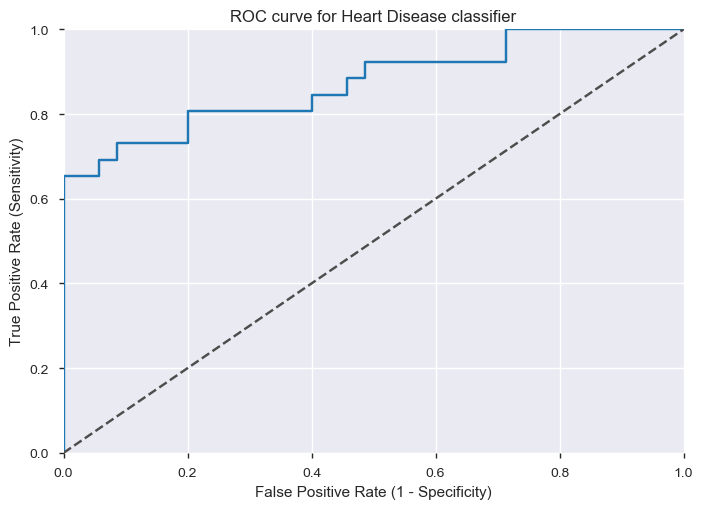

In [376]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_svm)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [377]:
auc(fpr, tpr)

0.8725274725274725

In [378]:
acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 80.33%


# Model 6: Naive Bayes

In [379]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [380]:
y_predict_nb = nb.predict(X_test)
y_pred_quant_nb = nb.predict_proba(X_test)[:, 1]
y_pred_bin_nb = nb.predict(X_test)

In [381]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_bin_nb)
confusion_matrix

array([[28,  7],
       [ 3, 23]], dtype=int64)

In [382]:
# Test sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['Naive_Bayes'] = sensitivity
print('Sensitivity of Naive Bayes Classifier Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['Naive_Bayes'] = specificity
print('Specificity of Naive Bayes Classifier Model: ', specificity)

Sensitivity of Naive Bayes Classifier Model:  0.9032258064516129
Specificity of Naive Bayes Classifier Model:  0.7666666666666667


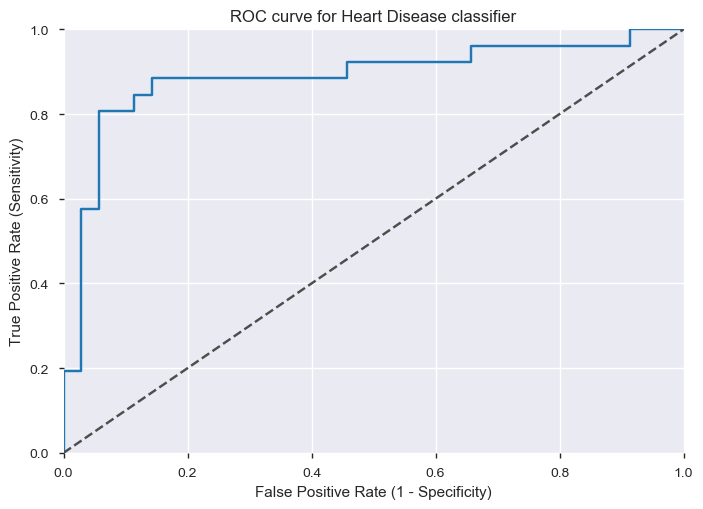

In [383]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_nb)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [384]:
auc(fpr, tpr)

0.8879120879120878

In [385]:
acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.61%


# Model 7: Gradient Boosting Machine

https://xgboost.readthedocs.io/en/latest/parameter.html

In [386]:
from xgboost import XGBClassifier

In [387]:
# Instantiate XGBClassifier
XGB = XGBClassifier()

# Fit XGBClassifier
XGB.fit(X_train, y_train)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
y_predict_xgb = XGB.predict(X_test)
y_pred_quant_xgb = XGB.predict_proba(X_test)[:, 1]
y_pred_bin_xgb = XGB.predict(X_test)

# Test sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
sensitivities['XGBoost'] = sensitivity
print('Sensitivity of XGBoost Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
specificities['XGBoost'] = specificity
print('Specificity of XGBoost Model: ', specificity)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Sensitivity of XGBoost Model:  0.9032258064516129
Specificity of XGBoost Model:  0.7666666666666667
Training Accuracy: 94.21%
Validation accuracy: 80.33%


In [388]:
#set max parameters
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [389]:
grid_clf = GridSearchCV(XGB, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
y_predict_grid = grid_clf.predict(X_test)
y_pred_quant_grid = grid_clf.predict_proba(X_test)[:, 1]
y_pred_bin_grid = grid_clf.predict(X_test)

print('')
# Test sensitivity and specificity
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity of Grid Search Model: ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity of Grid Search Model: ', specificity)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 2
n_estimators: 100
subsample: 0.5

Sensitivity of Grid Search Model:  0.9032258064516129
Specificity of Grid Search Model:  0.7666666666666667
Training Accuracy: 94.21%
Validation accuracy: 80.33%


In [390]:
acc = XGB.score(X_test,y_test)*100
accuracies['XGBoost'] = acc
print("Accuracy of XGBoost: {:.2f}%".format(acc))

Accuracy of XGBoost: 80.33%


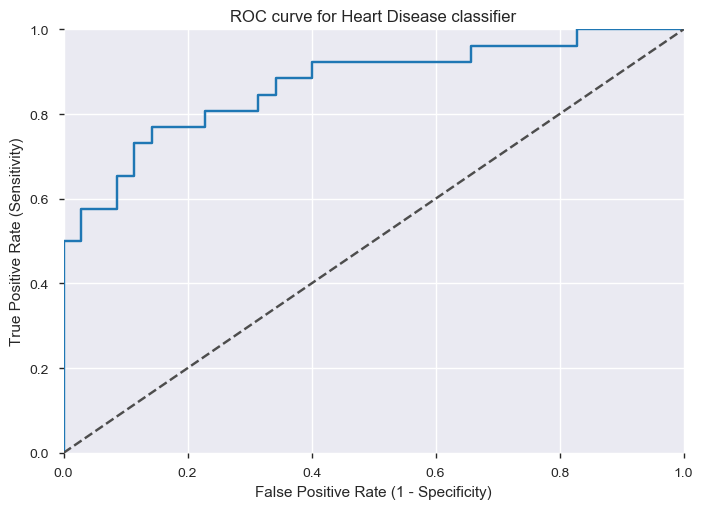

In [391]:
# Check with Receiver Operator Curve (ROC)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_grid)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Heart Disease classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [392]:
auc(fpr, tpr)

0.8703296703296703

# Comparing Models

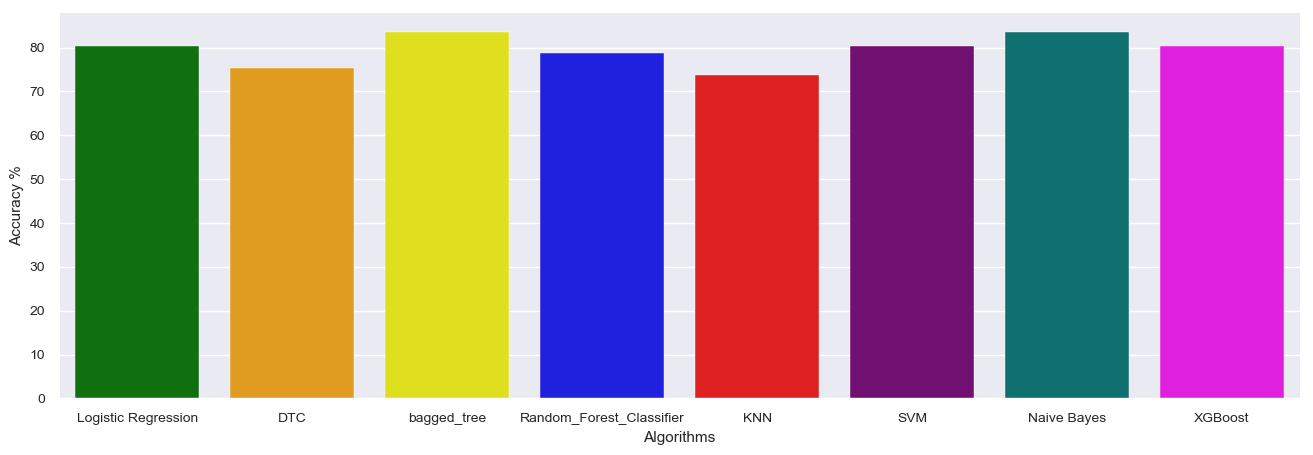

In [402]:
colors = ["green", "orange", "yellow", "blue", "red","purple","teal", "magenta"]

sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

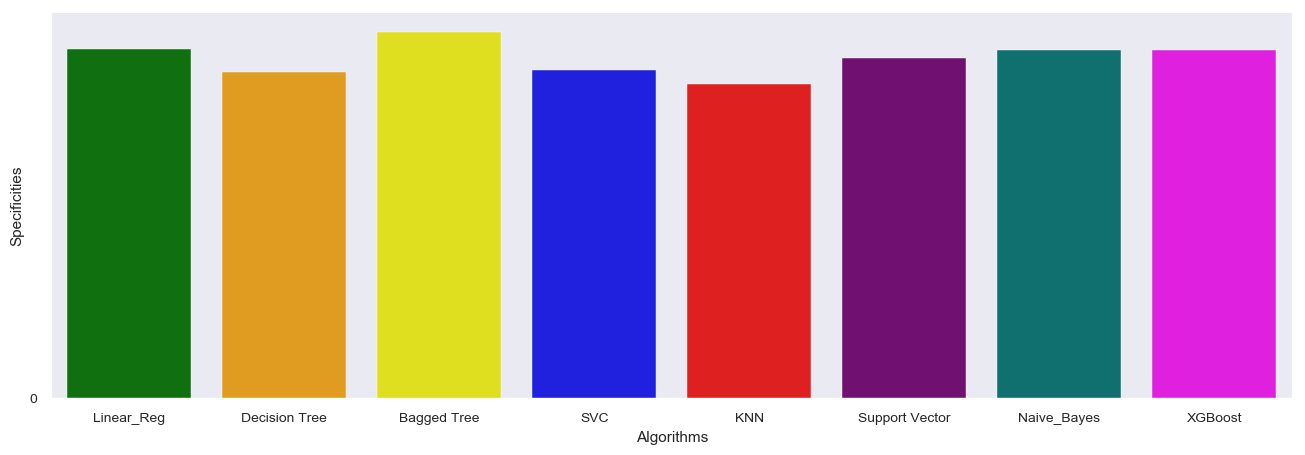

In [407]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1))
plt.ylabel("Specificities")
plt.xlabel("Algorithms")
sns.barplot(x=list(specificities.keys()), y=list(specificities.values()), palette=colors)
plt.show()

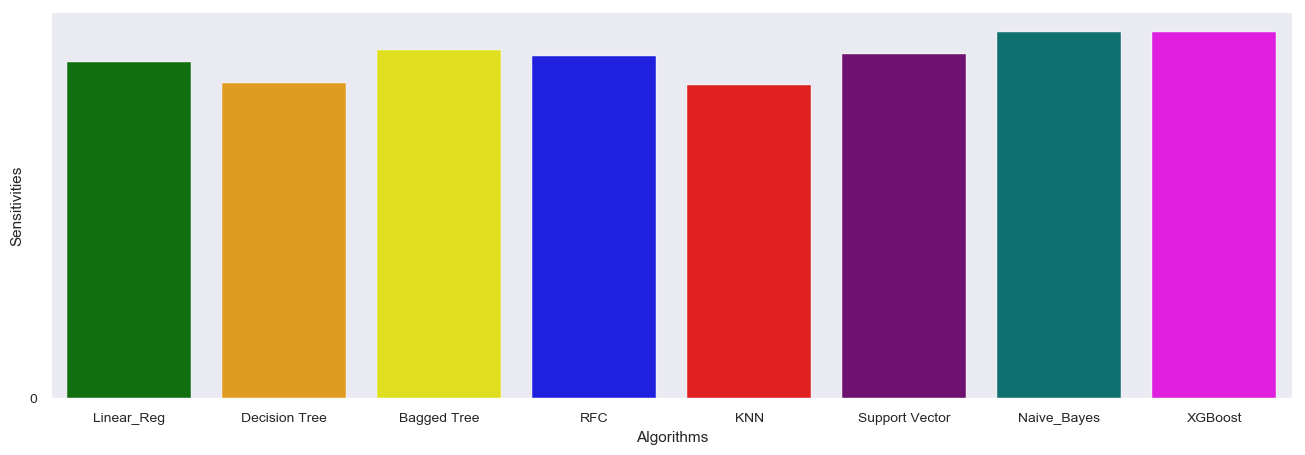

In [408]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,1))
plt.ylabel("Sensitivities")
plt.xlabel("Algorithms")
sns.barplot(x=list(sensitivities.keys()), y=list(sensitivities.values()), palette=colors)
plt.show()

- Models with highest **Specificity**: Bagged Tree, XGBoost
- Models with highest **Sensitivity**: Naive Bayes, XGBoost
- Worst performing models: Decision Tree and KNN

## Implications for this model

- Reduce invasive, unnecessary tests for low risk patients 
- Preventative care for patients who are high risk 
- Assess the frequency of appointments depending on risk level


## Future Work

- Use a larger data set across all states
- Time series data to look at trends
- Include race/ethnicity in data to ensure diversity and accurate representation of US population
- Principal Component Analysis on data
